In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
categorias = ['Calidad', 'Precio', 'Innovación', 'Servicio', 'Satisfacción', 'Sostenibilidad', 'Diseño']

data = pd.DataFrame({
    'nike': [7, 6, 8, 5, 7, 9, 6],
    'puma': [6, 8, 6, 7, 8, 7, 5],
    'flecha': [8, 7, 7, 8, 9, 6, 8]
}, index=categorias)

data.head()

,nike,puma,flecha
Calidad,7,6,8
Precio,6,8,7
Innovación,8,6,7
Servicio,5,7,8
Satisfacción,7,8,9


In [4]:
# Generacion de angulos por categorias
N = len(categorias)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

angles

[0.0,
 0.8975979010256552,
 1.7951958020513104,
 2.6927937030769655,
 3.5903916041026207,
 4.487989505128276,
 5.385587406153931,
 0.0]

In [5]:
angles_deg = np.degrees(angles).tolist()
angles_deg

[0.0,
 51.42857142857143,
 102.85714285714286,
 154.28571428571428,
 205.71428571428572,
 257.14285714285717,
 308.57142857142856,
 0.0]

In [11]:
def radar_chart(
        data,
        categorias,
        titulo='Comparación', 
        tamaño=(8, 8),
        rango_ylim=10, 
        modo_daltonico=False,
        colormap=None
        ):

    # Generación de ángulos
    N = len(categorias)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    # Configuración de colores para daltonismo
    if colormap:
        colors = plt.get_cmap(colormap)(np.linspace(0, 1, len(data.columns)))

    elif modo_daltonico:
        # Paletas aptas para daltonismo
        paletas_daltonicas = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
        colors = plt.get_cmap(paletas_daltonicas[0])(np.linspace(0, 1, len(data.columns)))

    else:
        colors = plt.cm.viridis(np.linspace(0, 1, len(data.columns)))
    
    # Creación del plot
    fig, ax = plt.subplots(
        figsize=tamaño,
        subplot_kw=dict(polar=True)
    )
    plt.title(titulo, size=16, y=1.1)
    
    # Generación de las series
    for col, color in zip(data.columns, colors):
        values = data[col].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=col, color=color)
        ax.fill(angles, values, color=color, alpha=0.4)
    
    # Configuración de ejes y estilos
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias, fontsize=12)
    ax.set_yticklabels([])
    ax.set_ylim(0, rango_ylim)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

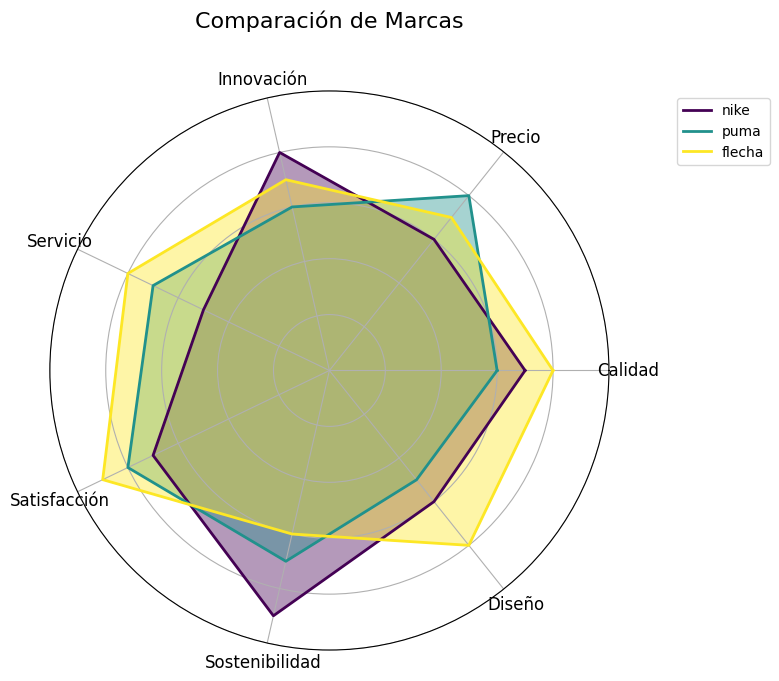

In [16]:
# Uso básico (igual que antes)
radar_chart(data, categorias, 'Comparación de Marcas')


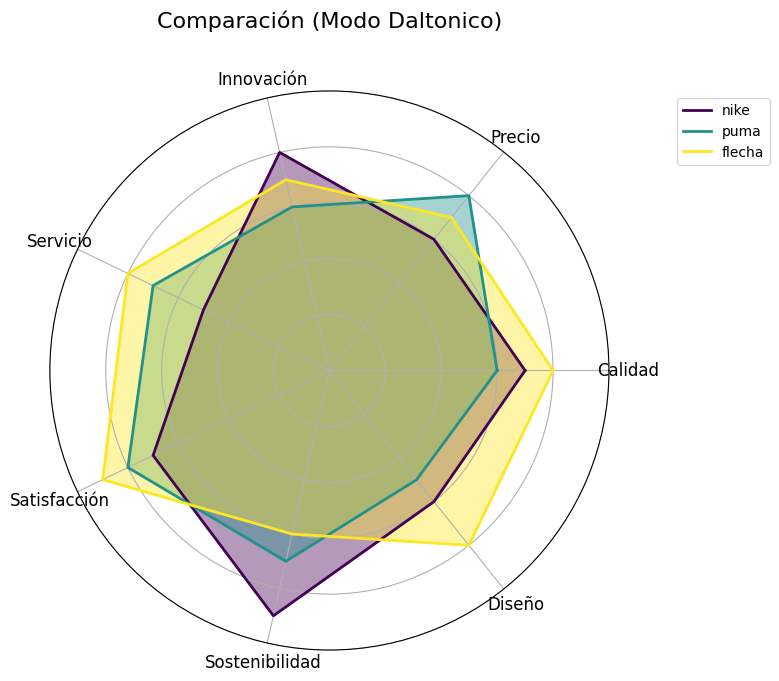

In [14]:
# Modo daltonico con paleta por defecto
radar_chart(data,categorias,titulo='Comparación (Modo Daltonico)',modo_daltonico=True)

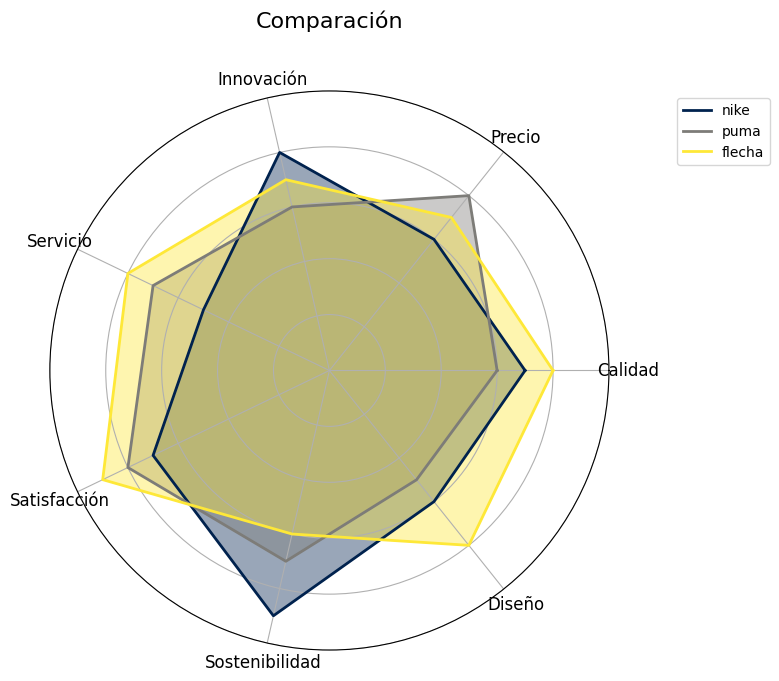

In [18]:
# Con paleta personalizada para daltonismo
radar_chart(data, categorias,colormap='cividis')

In [22]:
def radar_chart_daltonico(
        data,
        categorias,
        titulo='Comparación',
        tamaño=(8, 8),
        rango_ylim=10,
        tipo_paleta='viridis',
        tipo_daltonismo='general'):

    # Configuración de paletas según tipo de daltonismo
    paletas_config = {
        'general': {
            'secuencial': ['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
            'categórica': ['tab10', 'Set2', 'Dark2', 'Paired'],
            'divergente': ['coolwarm', 'RdYlBu', 'PiYG']
        },
        'deuteranopia': {
            'secuencial': ['viridis', 'plasma', 'cividis'],
            'categórica': ['tab10', 'Set2', 'Dark2'],
            'divergente': ['coolwarm', 'RdYlBu']
        },
        'protanopia': {
            'secuencial': ['viridis', 'plasma', 'cividis'],
            'categórica': ['tab10', 'Set2', 'Dark2'],
            'divergente': ['coolwarm', 'RdYlBu']
        },
        'tritanopia': {
            'secuencial': ['viridis', 'plasma', 'magma'],
            'categórica': ['tab10', 'Set2', 'Dark2'],
            'divergente': ['coolwarm', 'PiYG']
        }
    }
    
    # Seleccionar paleta
    paletas_disponibles = paletas_config[tipo_daltonismo][tipo_paleta]
    colormap = paletas_disponibles[0]  # Usar la primera por defecto
    
    # Generación de ángulos
    N = len(categorias)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    # Generar colores
    if tipo_paleta == 'categórica':
        colors = plt.get_cmap(colormap)(np.linspace(0, 1, len(data.columns)))
    else:
        colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.8, len(data.columns)))
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=tamaño, subplot_kw=dict(polar=True))
    plt.title(f'{titulo} - {tipo_daltonismo.title()}', size=16, y=1.1)
    
    # Generación de las series
    for col, color in zip(data.columns, colors):
        values = data[col].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=col, color=color)
        ax.fill(angles, values, color=color, alpha=0.4)
    
    # Configuración de ejes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias, fontsize=12)
    ax.set_yticklabels([])
    ax.set_ylim(0, rango_ylim)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

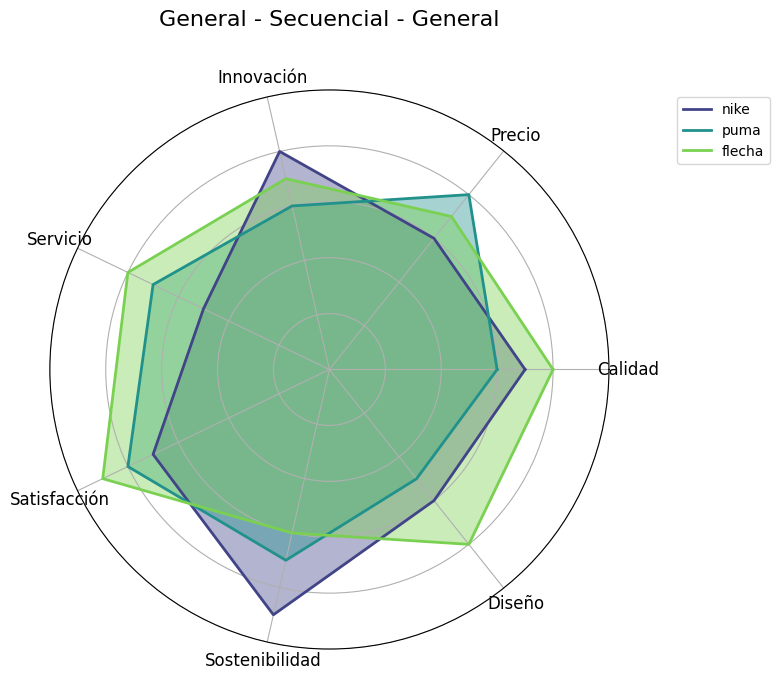

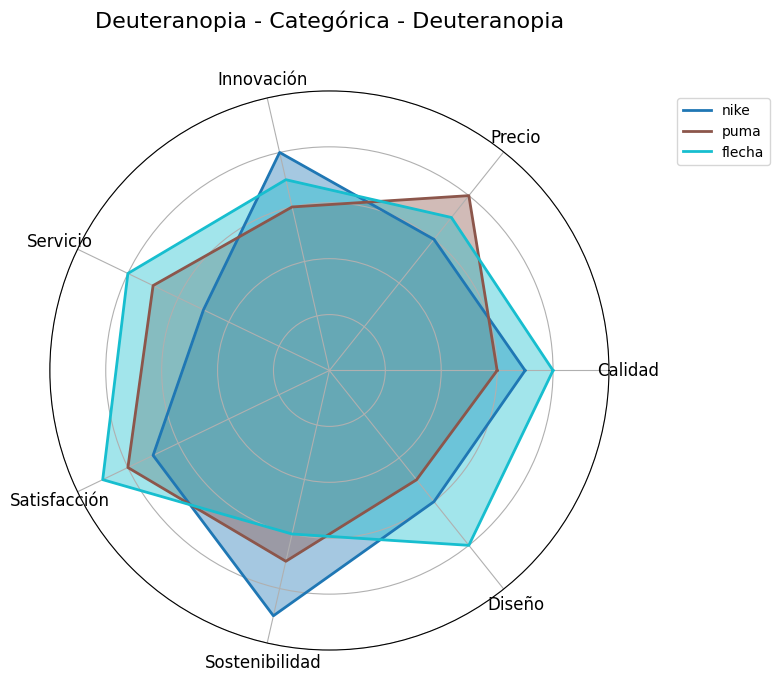

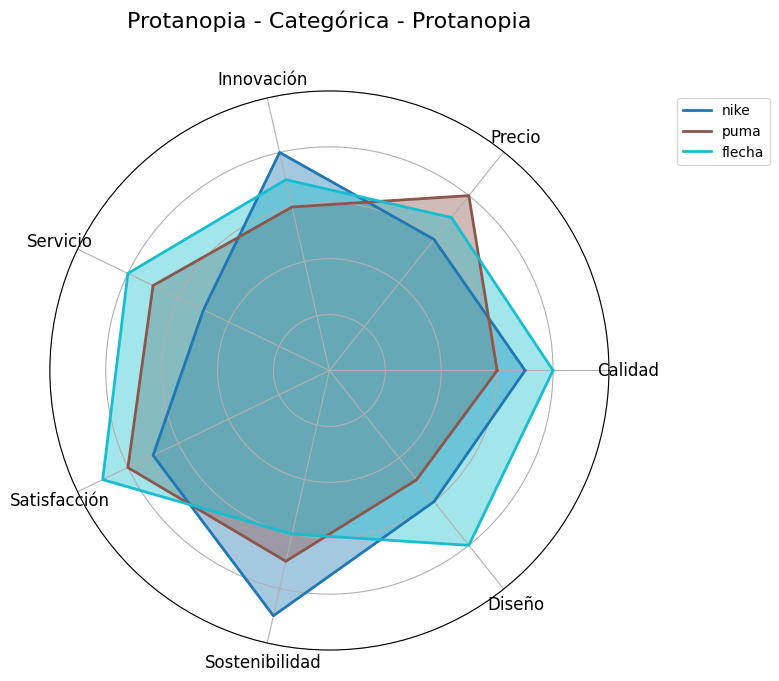

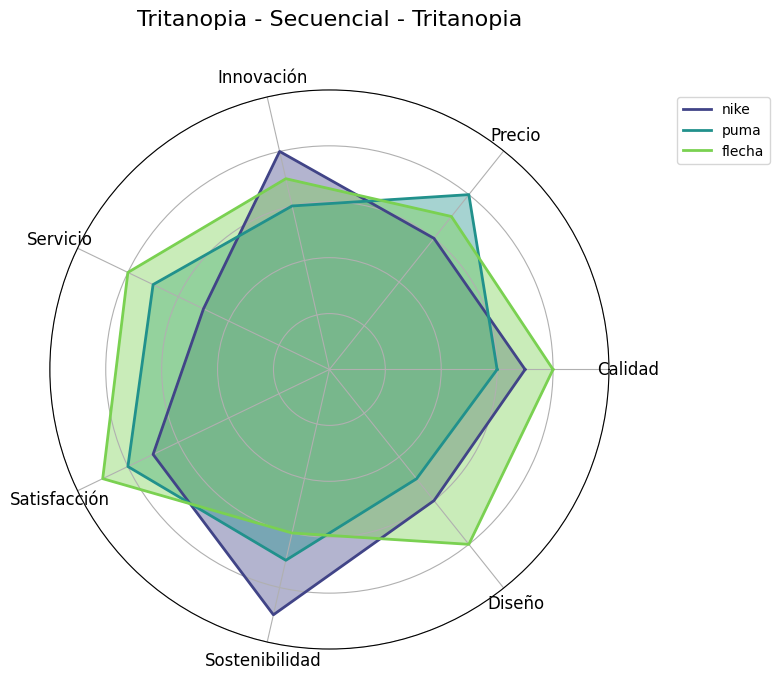

In [23]:
# Configuraciones a probar
configuraciones = [
    {'tipo_daltonismo': 'general', 'tipo_paleta': 'secuencial', 'titulo': 'General - Secuencial'},
    {'tipo_daltonismo': 'deuteranopia', 'tipo_paleta': 'categórica', 'titulo': 'Deuteranopia - Categórica'},
    {'tipo_daltonismo': 'protanopia', 'tipo_paleta': 'categórica', 'titulo': 'Protanopia - Categórica'},
    {'tipo_daltonismo': 'tritanopia', 'tipo_paleta': 'secuencial', 'titulo': 'Tritanopia - Secuencial'}
]

# Generar todos los gráficos
for config in configuraciones:
    radar_chart_daltonico(
        data, 
        categorias, 
        titulo=config['titulo'],
        tipo_daltonismo=config['tipo_daltonismo'],
        tipo_paleta=config['tipo_paleta']
    )
    

In [20]:
def mostrar_paletas_colorblind():
    
    configs = [
        ('General', 'viridis'),
        ('Deuteranopia', 'cividis'),
        ('Protanopia', 'plasma'),
        ('Tritanopia', 'magma')
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    for idx, (nombre, paleta) in enumerate(configs):
        ax = axes[idx//2, idx%2]
        
        # Generar colores de ejemplo
        colors = plt.get_cmap(paleta)(np.linspace(0, 1, 8))
        
        # Mostrar barras de colores
        for i, color in enumerate(colors):
            ax.barh(i, 1, color=color, edgecolor='white')
        
        ax.set_title(f'{nombre} - {paleta}')
        ax.set_yticks([])
        ax.set_xticks([])
    
    plt.tight_layout()
    plt.show()


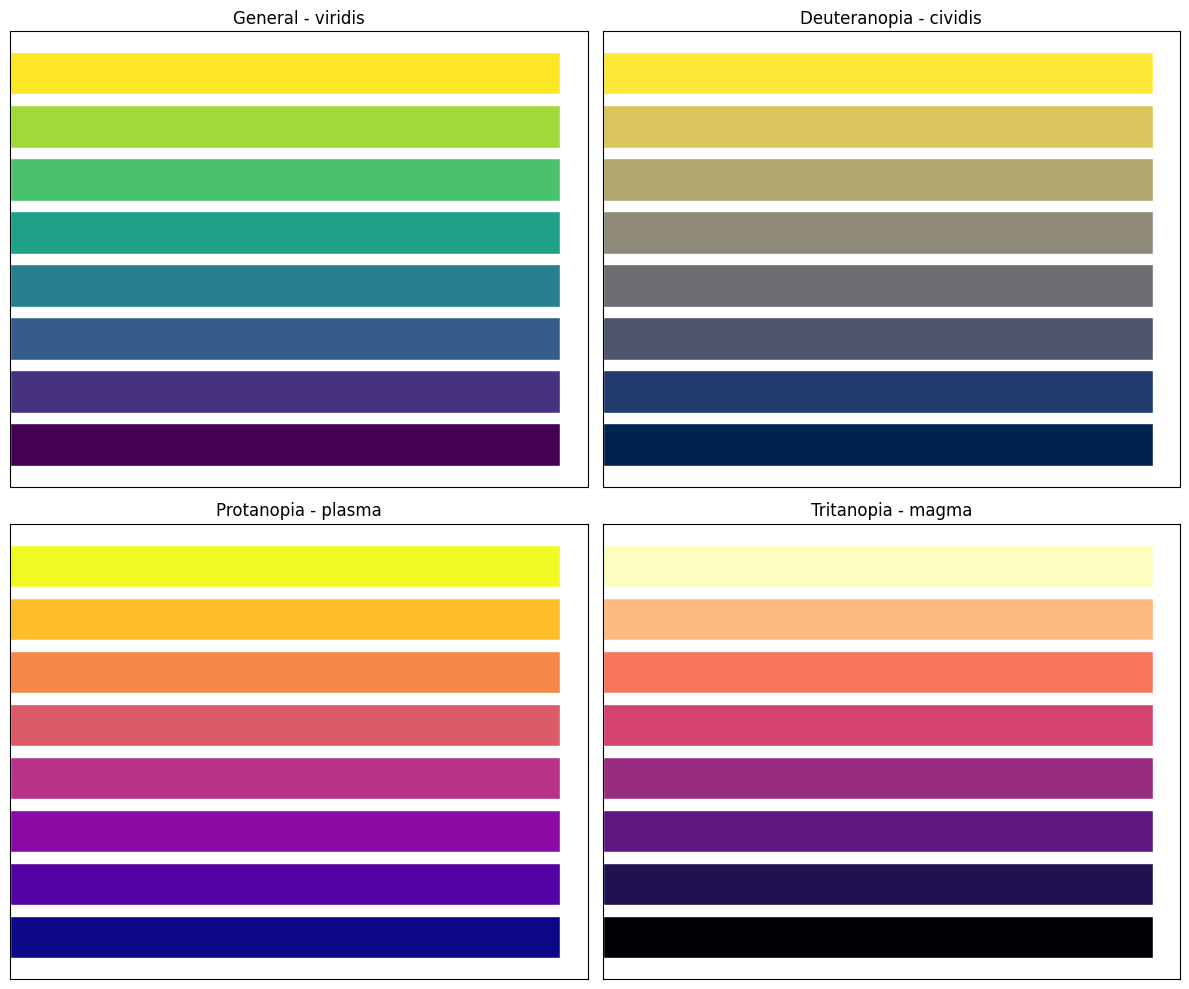

In [21]:
mostrar_paletas_colorblind()